In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
react = pd.read_csv('Reactions.csv')
react_type = pd.read_csv('ReactionTypes.csv')
content = pd.read_csv('Content.csv')

In [4]:
react.info()
print(react.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB
(25553, 5)


In [5]:
react_type.info()
print(react_type.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes
(16, 4)


In [6]:
content.info()
print(content.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB
(1000, 6)


In [7]:
react['User ID'].nunique()

500

In [8]:
content['User ID'].nunique()

446

In [9]:
react_type.isnull().sum()

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64

In [10]:
react.isnull().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [11]:
content.isnull().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [12]:
# drop the rows with null values
react.dropna(inplace=True)
print(react.isnull().sum())
print("shape",react.shape)

Unnamed: 0    0
Content ID    0
User ID       0
Type          0
Datetime      0
dtype: int64
shape (22534, 5)


In [13]:
# drop the rows with null values
content.dropna(inplace=True)
print(content.isnull().sum())
print("shape",content.shape)

Unnamed: 0    0
Content ID    0
User ID       0
Type          0
Category      0
URL           0
dtype: int64
shape (801, 6)


In [14]:
# drop the rows with null values
react_type.dropna(inplace=True)
print(react_type.isnull().sum())
print("shape",react_type.shape)

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64
shape (16, 4)


In [15]:
react.drop(['Unnamed: 0'],axis=1,inplace=True)

In [16]:
react['Datetime'] = pd.to_datetime(react['Datetime'])

In [17]:
react

,Content ID,User ID,Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58
...,...,...,...,...
25547,75d6b589-7fae-4a6d-b0d0-752845150e56,b6d04982-1509-41ab-a700-b390d6cb4d02,worried,2020-10-31 04:50:14
25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48
25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02
25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31


In [18]:
react_type.drop(['Unnamed: 0'],axis=1,inplace=True)
react_type

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30
5,indifferent,neutral,20
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72


In [19]:
content.drop(['Unnamed: 0'],axis=1,inplace=True)
content

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
...,...,...,...,...,...
994,c54b49c4-b1f2-4641-8595-1cbd19937845,2ab641a8-6ad4-4d1a-8511-d87ff5346773,photo,science,https://socialbuzz.cdn.com/content/storage/c54...
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,4fe420fa-a193-4408-bd5d-62a020233609,GIF,technology,https://socialbuzz.cdn.com/content/storage/7a7...
997,435007a5-6261-4d8b-b0a4-55fdc189754b,35d6a1f3-e358-4d4b-8074-05f3b7f35c2a,audio,veganism,https://socialbuzz.cdn.com/content/storage/435...
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,b9bcd994-f000-4f6b-87fc-caae08acfaa1,GIF,culture,https://socialbuzz.cdn.com/content/storage/4e4...


## Data Modeling

In [20]:
# merge all the three dataframes
df = react.merge(react_type, how='left', on='Type')
df.head()

,Content ID,User ID,Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,positive,30


In [21]:
df = df.rename(columns={'Type':'Reaction Type'})
df.head()

,Content ID,User ID,Reaction Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,positive,30


In [22]:
data = df.merge(content.drop('User ID',axis=1), on=['Content ID'], how='left')
data.head()

,Content ID,User ID,Reaction Type,Datetime,Sentiment,Score,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,positive,30,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...


In [23]:
data

,Content ID,User ID,Reaction Type,Datetime,Sentiment,Score,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,positive,30,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
...,...,...,...,...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,b6d04982-1509-41ab-a700-b390d6cb4d02,worried,2020-10-31 04:50:14,negative,12,audio,technology,https://socialbuzz.cdn.com/content/storage/75d...
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48,negative,10,audio,technology,https://socialbuzz.cdn.com/content/storage/75d...
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02,positive,45,audio,technology,https://socialbuzz.cdn.com/content/storage/75d...
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31,negative,12,audio,technology,https://socialbuzz.cdn.com/content/storage/75d...


In [24]:
data.to_csv('accenture_global_dataset.csv', index=False)

In [25]:
df = pd.read_csv('accenture_global_dataset.csv')

## Top 5 performing categories

In [26]:
# top 5 performing categories
df['Category'].value_counts().head(5)

travel            1368
science           1351
animals           1323
healthy eating    1303
cooking           1277
Name: Category, dtype: int64

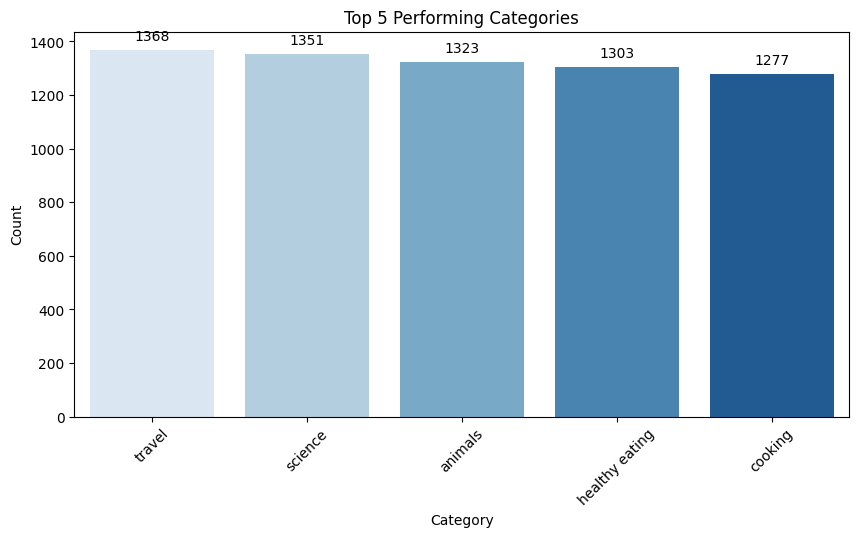

<Figure size 640x480 with 0 Axes>

In [27]:
# plot the top 5 performing categories
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Category',data=df,order=df['Category'].value_counts().iloc[:5].index, palette='Blues')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 5 Performing Categories')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

# save the plot
plt.savefig('Top 5 Performing Categories.png')


In [28]:
# top 5 performing categories by sentiment
df.groupby(['Category','Sentiment'])['Score'].sum().sort_values(ascending=False).head(5)

Category        Sentiment
travel          positive     45705
science         positive     45457
healthy eating  positive     45049
animals         positive     44106
cooking         positive     41888
Name: Score, dtype: int64

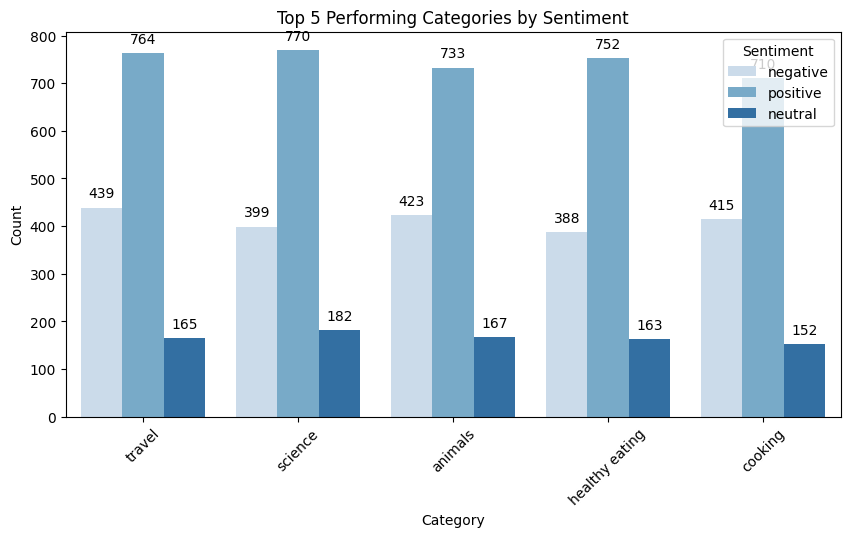

<Figure size 640x480 with 0 Axes>

In [29]:
# plot the top 5 performing categories by sentiment
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Category',data=df,order=df['Category'].value_counts().iloc[:5].index, hue='Sentiment', palette='Blues')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 5 Performing Categories by Sentiment')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

# save the plot
plt.savefig('Top 5 Performing Categories by Sentiment.png')

In [30]:
# top 5 performing categories by score
df.groupby(['Category','Score'])['Score'].sum().sort_values(ascending=False).head(5)

Category        Score
travel          70       12530
healthy eating  70       11970
animals         70       11970
science         70       11900
food            70       11620
Name: Score, dtype: int64

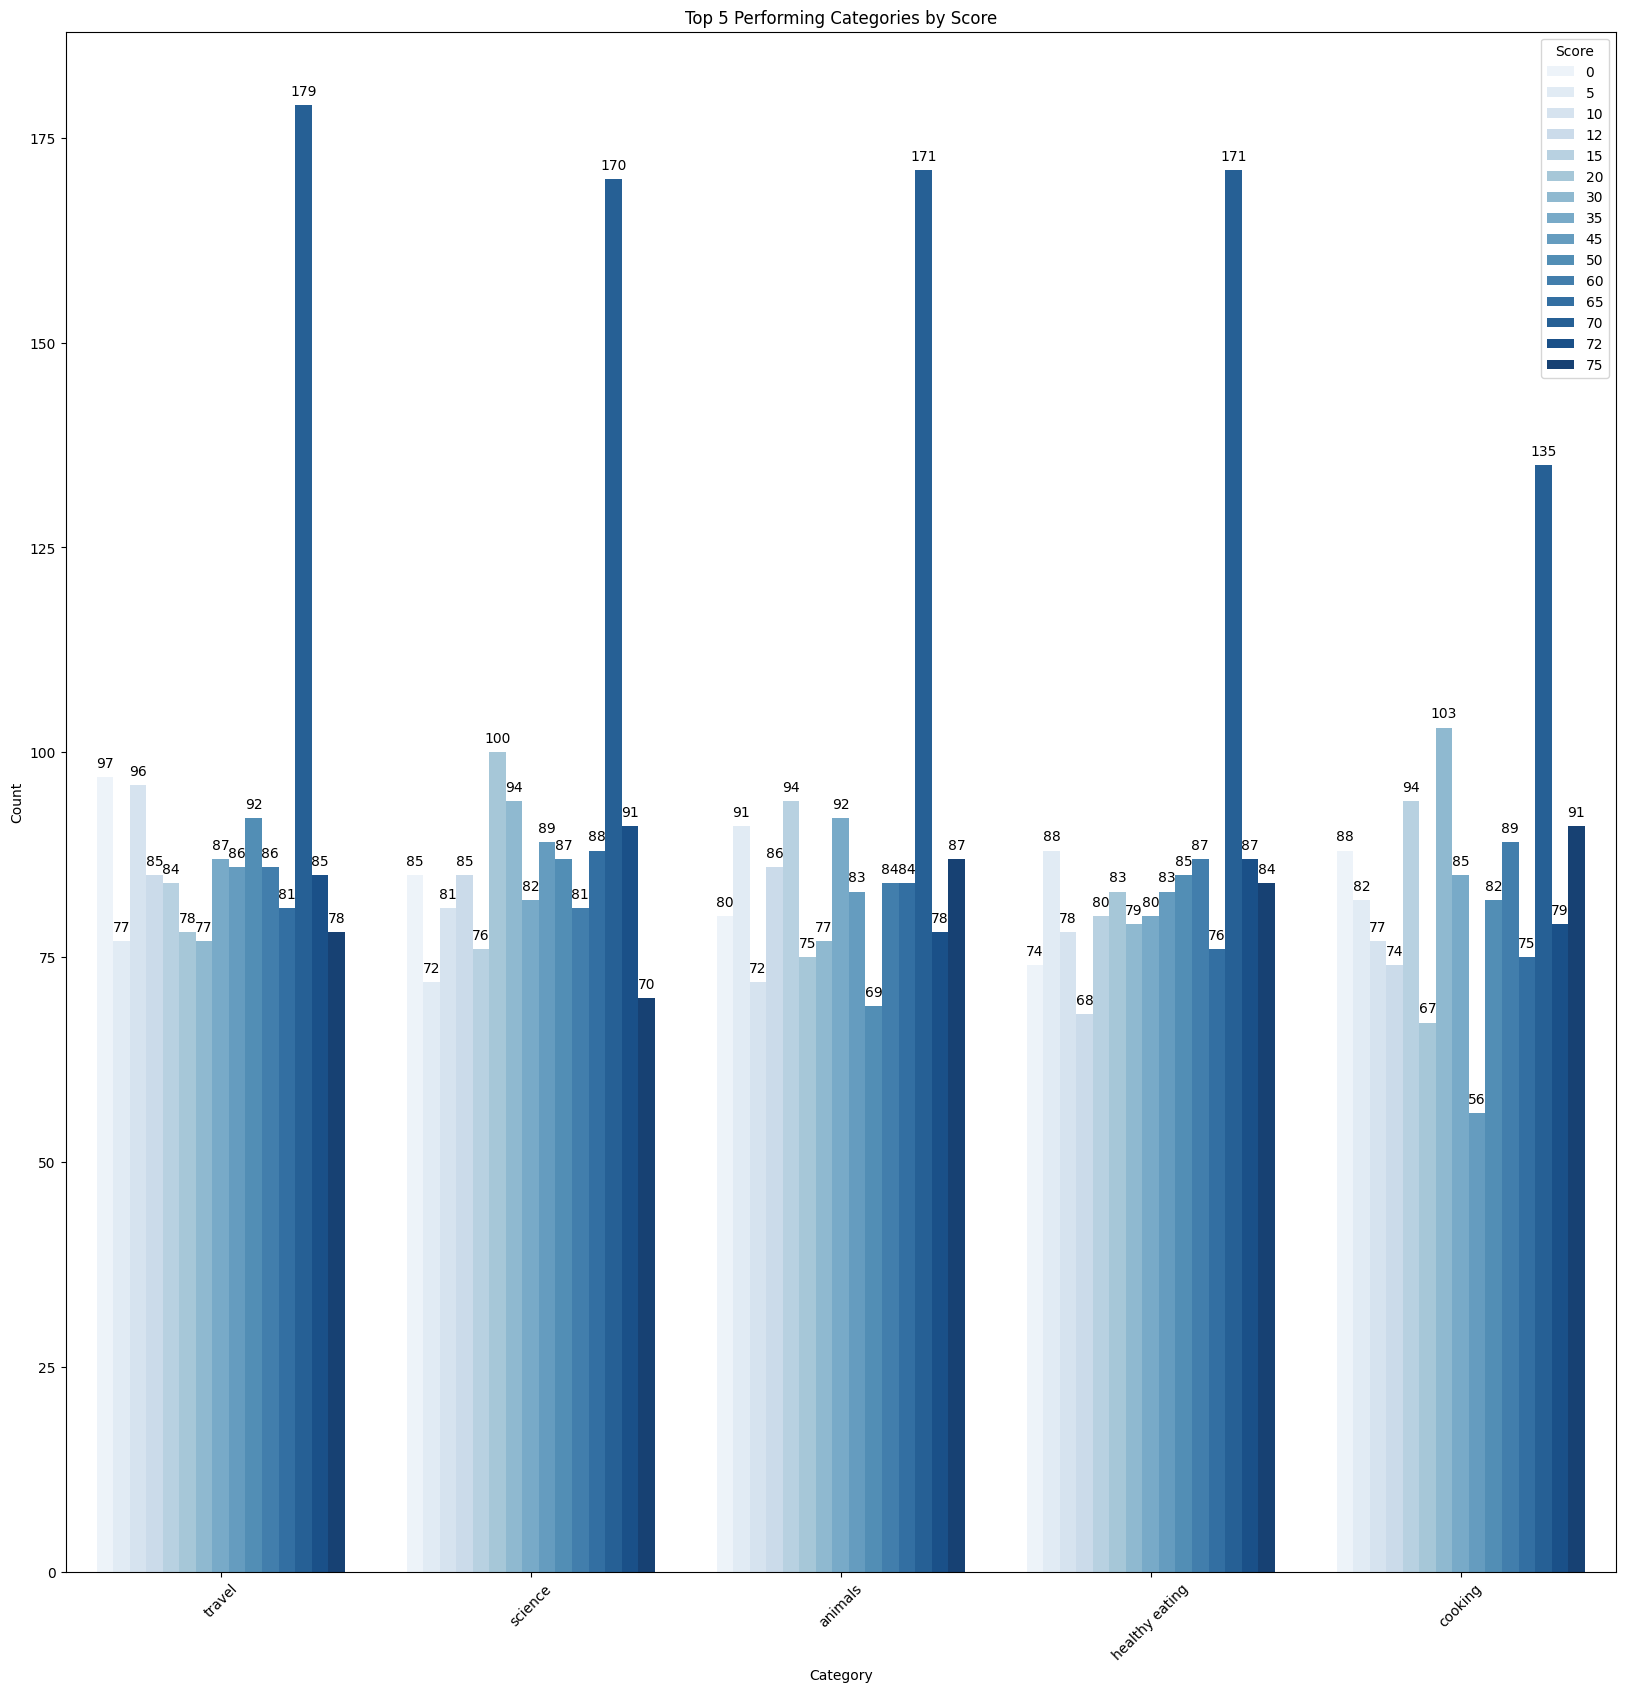

<Figure size 640x480 with 0 Axes>

In [31]:
# plot the top 5 performing categories by score
plt.figure(figsize=(20,20))
ax = sns.countplot(x='Category',data=df,order=df['Category'].value_counts().iloc[:5].index, hue='Score', palette='Blues')
plt.ylabel('Count')
plt.title('Top 5 Performing Categories by Score')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

# save the plot
plt.savefig('Top 5 Performing Categories by Score.png')

In [32]:
# categories with most reactions
df.groupby(['Category'])['Reaction Type'].count().sort_values(ascending=False).head(5)

Category
travel            1368
science           1351
animals           1323
healthy eating    1303
cooking           1277
Name: Reaction Type, dtype: int64

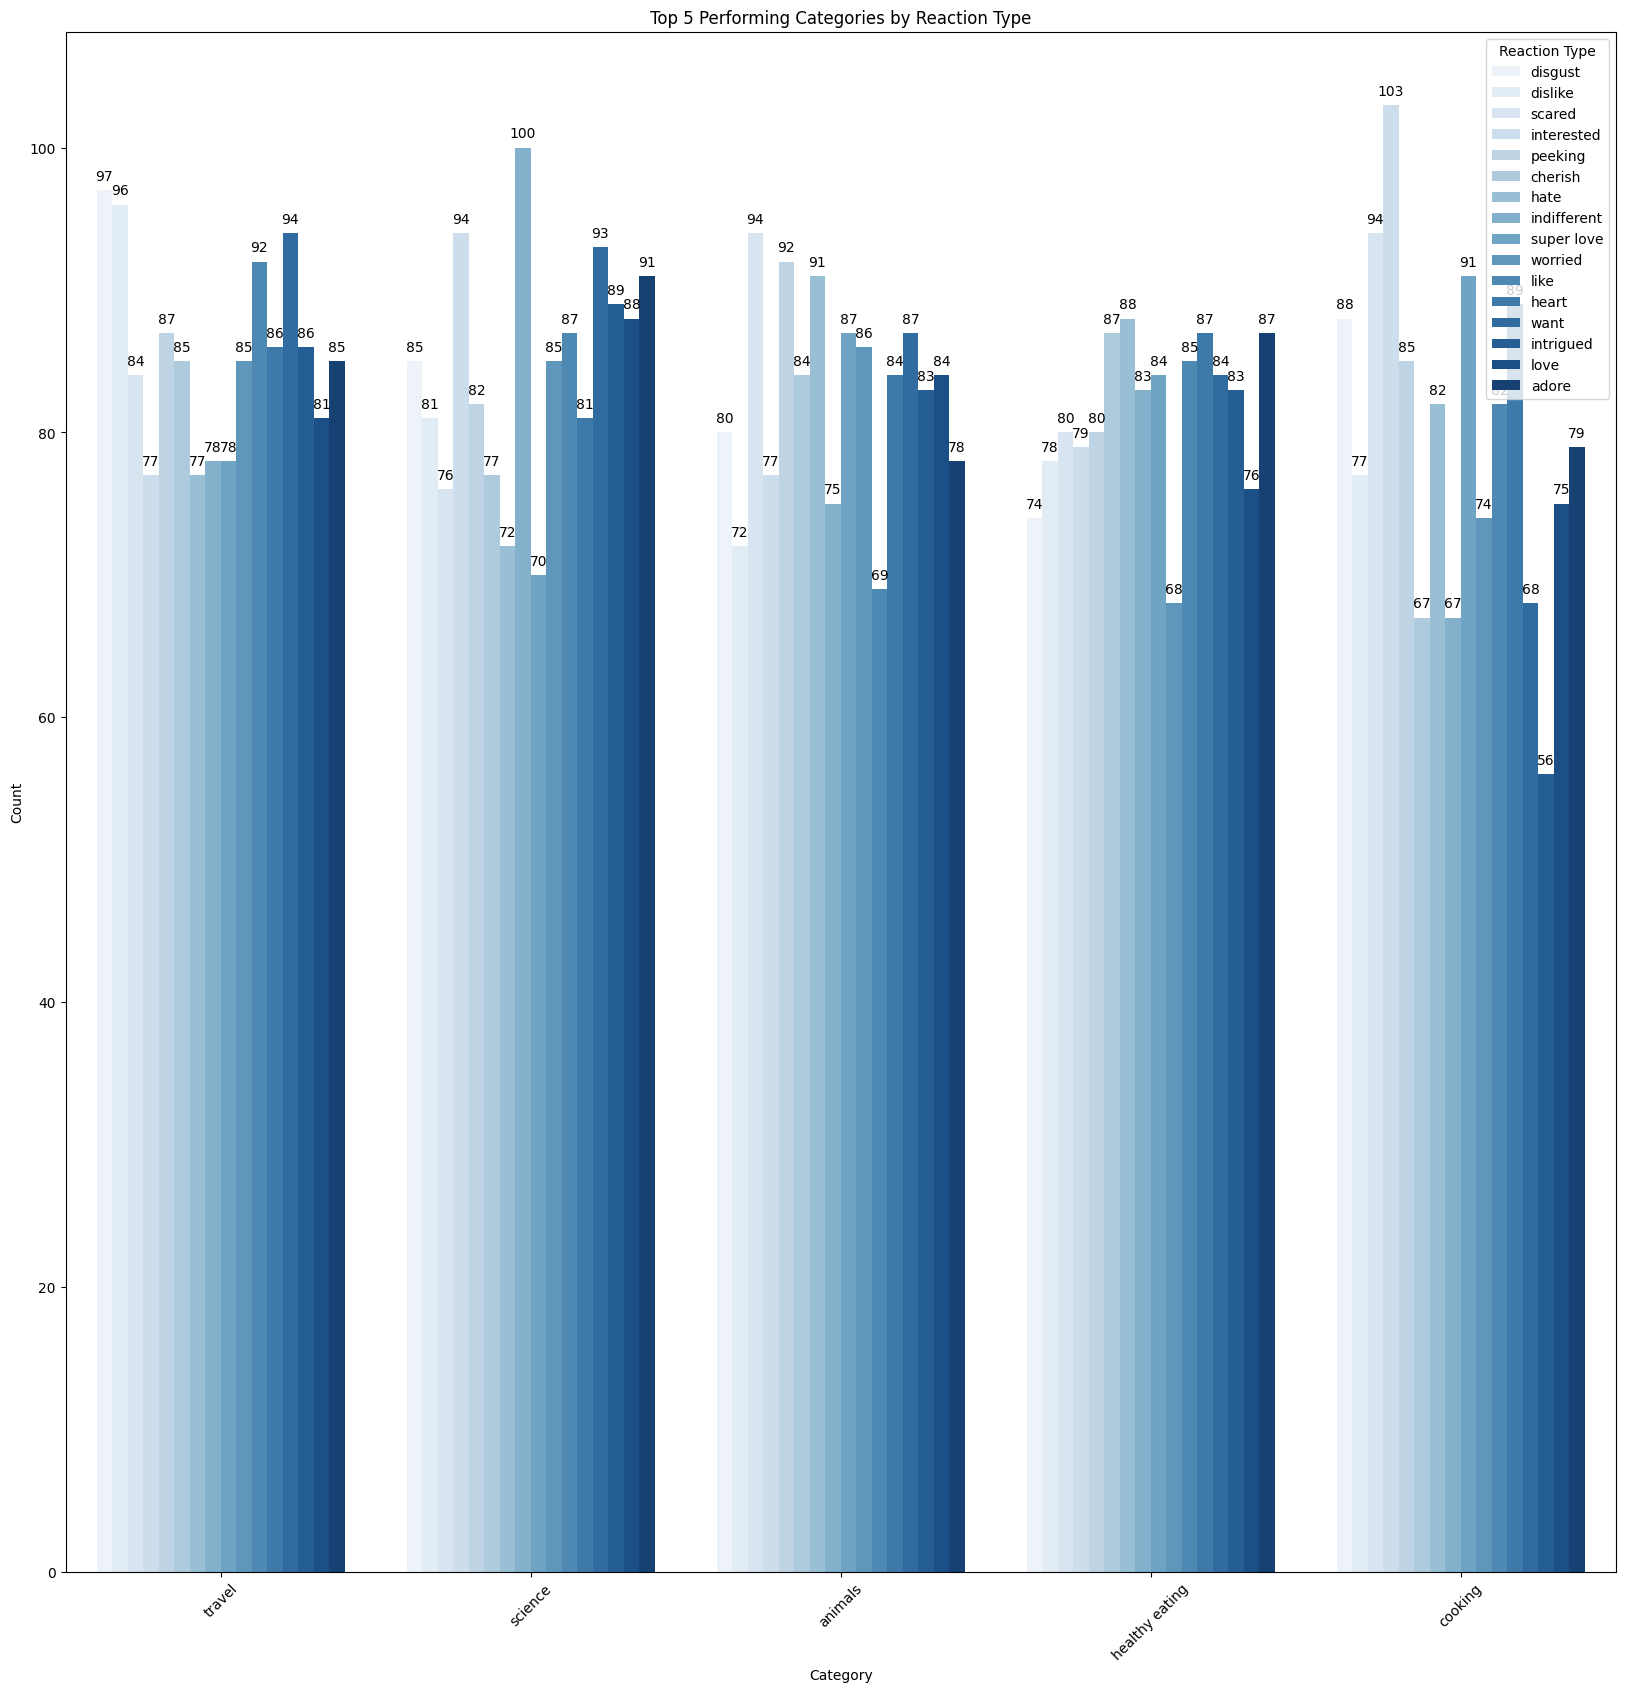

<Figure size 640x480 with 0 Axes>

In [33]:
# plot the reaction type for top 5 performing categories
plt.figure(figsize=(20,20))
ax = sns.countplot(x='Category',data=df,order=df['Category'].value_counts().iloc[:5].index, hue='Reaction Type', palette='Blues')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 5 Performing Categories by Reaction Type')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

# save the plot
plt.savefig('Top 5 Performing Categories by Reaction Type.png')